In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-full/Onyx Data - DataDNA Dataset Challenge - July 2021 - Spotify Tracks.csv


## Reading the Date

In [47]:
df = pd.read_csv("/kaggle/input/spotify-dataset-full/Onyx Data - DataDNA Dataset Challenge - July 2021 - Spotify Tracks.csv")
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


### Data Cleaning

In [48]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [49]:
df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [50]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

We can see that there are 71 names missing in the name field. 

Changing all the missing values to "Not available"

In [51]:
df[df['name'].isnull()].name

226336    NaN
510975    NaN
510976    NaN
510978    NaN
510979    NaN
         ... 
517206    NaN
517215    NaN
520127    NaN
525238    NaN
525265    NaN
Name: name, Length: 71, dtype: object

In [52]:
df['name']=df['name'].fillna('Not avilable')


In [53]:
df[df['name'].isnull()].name

Series([], Name: name, dtype: object)

So, now there is no missing values in name field, all of those have been changed to "Not available"

In [54]:
df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

Now, the data has no missing values.

In [55]:
df['release_date'].describe()

count         586672
unique         19700
top       1998-01-01
freq            2893
Name: release_date, dtype: object

In [56]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


The artists name are in list format, so we change it into string format

In [57]:
df['artists']

0                                 ['Uli']
1                     ['Fernando Pessoa']
2                     ['Ignacio Corsini']
3                     ['Ignacio Corsini']
4                         ['Dick Haymes']
                       ...               
586667                        ['阿YueYue']
586668                     ['ROLE MODEL']
586669                        ['FINNEAS']
586670    ['Gentle Bones', 'Clara Benin']
586671                      ['Afrosound']
Name: artists, Length: 586672, dtype: object

In [58]:
artist_names = []

for i in range(0,len(df)):
    b=""
    a = df['artists'][i]
    for j in range(0,len(a)):
        if (a[j]>'A' and a[j]<'Z') or (a[j]>'a' and a[j]<'z') or (a[j]==',') or (a[j]==" "):
            b = b + a[j]
    artist_names.append(b)

    
artist_names
        


['Uli',
 'Fernndo Pesso',
 'Igncio Corsini',
 'Igncio Corsini',
 'Dick Hymes',
 'Dick Hymes',
 'Frncis Mrty',
 'Mistinguett',
 'Greg Fieler',
 'Igncio Corsini',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'Uli',
 'Lucien Boyer',
 'Flix Myol',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'Victor Boucher',
 'Igncio Corsini',
 'Jenne Sint Bonnet',
 'Fernndo Pesso',
 'Igncio Corsini',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'dolphe Brrd',
 'Louis Lynel',
 'Igncio Corsini',
 'Perchicot',
 'Mri Konopnick',
 'Perchicot',
 'Igncio Corsini',
 'Dick Hymes',
 'Igncio Corsini',
 'Igncio Corsini',
 'Fernndo Pesso',
 'Dick Hymes, Gordon Jenkins, His Orchestr',
 'Dick Hymes, Hrry Jmes, His Orchestr',
 'Igncio Corsini',
 'Murice Chevlier',
 'Fernndo Pesso',
 'Igncio Corsini',
 'Drn',
 'Mistinguett',
 'Fernndo Pesso',
 'Dick Hymes',
 'Grndcubby Trio',
 'Victor Boucher',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'Fernndo Pesso',
 'Jim Chpmn',
 'Igncio Corsini',
 'Igncio Corsini',
 'Mri Konopnick',
 'Igncio C

creating a temp dataframe

In [59]:
temp = pd.DataFrame()

creating a column called "Artists_name" and updating the values from the list "artist_names"

In [60]:
temp['artist_names'] = artist_names

In [61]:
temp

,artist_names
0,Uli
1,Fernndo Pesso
2,Igncio Corsini
3,Igncio Corsini
4,Dick Hymes
...,...
586667,YueYue
586668,ROLE MODEL
586669,FINNES
586670,"Gentle Bones, Clr Benin"


Now, we have artist names and artist id in the "temp" dataframe. so now we need to combine append the original dataframe with temp dataframe 

In [62]:
result = pd.concat([df,temp],axis=1)
result

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernndo Pesso
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Igncio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Igncio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Hymes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,YueYue
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNES
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,"Gentle Bones, Clr Benin"


In [63]:
result.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernndo Pesso
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Igncio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Igncio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Hymes


dropping the previous artists name

In [64]:
result.drop('artists',axis=1,inplace=True)

In [65]:
result.head()

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernndo Pesso
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Igncio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Igncio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Hymes


column "id" and "id_artists" are not required so we drop those columns

In [66]:
result.drop(['id','id_artists'],axis=1,inplace=True)

In [67]:
result.head()

,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names
0,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,Uli
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,Fernndo Pesso
2,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,Igncio Corsini
3,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,Igncio Corsini
4,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,Dick Hymes


The is few values in the column 'release_date' which has only year and day, months are not included,

In [68]:
#for i in range(0,len(result)):
 #   print(df['release_date'][i])

For most of the values only year is present so, we take as 'year_released' instead of 'released_date'

In [69]:
#Extracting the year from date
year_released=[]
for i in range(0,len(result)):
    a=result['release_date'][i][:4]
    year_released.append(a)


In [70]:
# creating a new dataframe for storing years
year = pd.DataFrame()
year['year_released'] = year_released

In [71]:
year

,year_released
0,1922
1,1922
2,1922
3,1922
4,1922
...,...
586667,2020
586668,2020
586669,2020
586670,2021


In [72]:
# concating with result
result = pd.concat([result,year],axis=1)
result

,name,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names,year_released
0,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli,1922
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernndo Pesso,1922
2,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Igncio Corsini,1922
3,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Igncio Corsini,1922
4,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Hymes,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,YueYue,2020
586668,blind,72,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL,2020
586669,What They'll Say About Us,70,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNES,2020
586670,A Day At A Time,58,142003,0,2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,"Gentle Bones, Clr Benin",2021


dropping the release date from result dataframe

In [73]:
result.drop('release_date',axis=1,inplace=True)

In [74]:
result

,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_names,year_released
0,Carve,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli,1922
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernndo Pesso,1922
2,Vivo para Quererte - Remasterizado,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Igncio Corsini,1922
3,El Prisionero - Remasterizado,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Igncio Corsini,1922
4,Lady of the Evening,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Hymes,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,YueYue,2020
586668,blind,72,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL,2020
586669,What They'll Say About Us,70,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNES,2020
586670,A Day At A Time,58,142003,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,"Gentle Bones, Clr Benin",2021


## Correlations

In [75]:
col = ['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

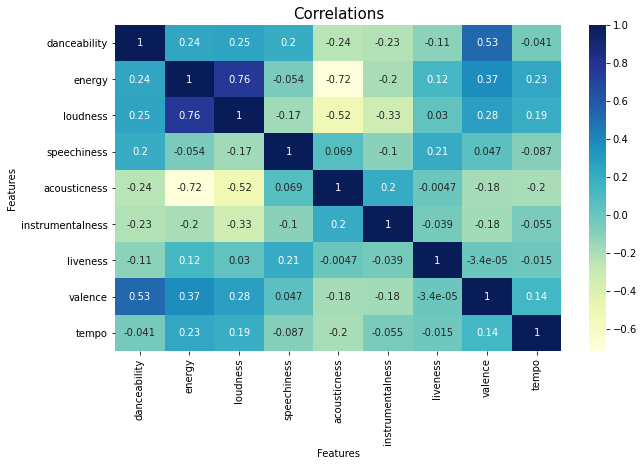

In [77]:
figure = plt.figure(figsize=(10,6))
sns.heatmap(result[col].corr(),cmap="YlGnBu",annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

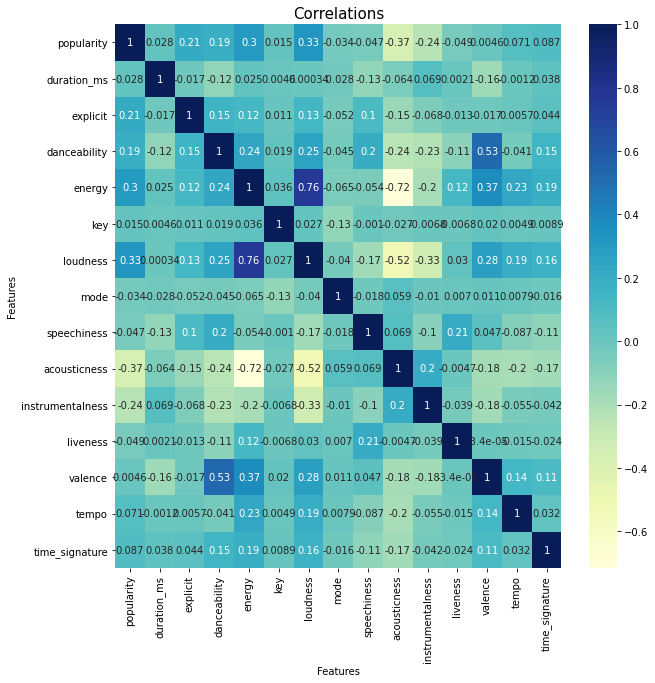

In [78]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(result.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [79]:
cor_mat = result.corr()
cor_pairs = cor_mat.unstack()
cor_pairs

popularity      popularity          1.000000
                duration_ms         0.027681
                explicit            0.211758
                danceability        0.187000
                energy              0.302315
                                      ...   
time_signature  instrumentalness   -0.042257
                liveness           -0.024202
                valence             0.105529
                tempo               0.031875
                time_signature      1.000000
Length: 225, dtype: float64

In [80]:
sorted_pairs=cor_pairs.sort_values()

In [81]:
sorted_pairs

energy          acousticness     -0.715412
acousticness    energy           -0.715412
                loudness         -0.519423
loudness        acousticness     -0.519423
acousticness    popularity       -0.370882
                                    ...   
danceability    danceability      1.000000
explicit        explicit          1.000000
duration_ms     duration_ms       1.000000
tempo           tempo             1.000000
time_signature  time_signature    1.000000
Length: 225, dtype: float64

## Columns with Higher Correlations

In [82]:
sorted_pairs[sorted_pairs>0.5]

valence           danceability        0.528150
danceability      valence             0.528150
energy            loudness            0.764735
loudness          energy              0.764735
popularity        popularity          1.000000
mode              mode                1.000000
valence           valence             1.000000
liveness          liveness            1.000000
instrumentalness  instrumentalness    1.000000
acousticness      acousticness        1.000000
speechiness       speechiness         1.000000
loudness          loudness            1.000000
key               key                 1.000000
energy            energy              1.000000
danceability      danceability        1.000000
explicit          explicit            1.000000
duration_ms       duration_ms         1.000000
tempo             tempo               1.000000
time_signature    time_signature      1.000000
dtype: float64

The columns "Energy" and "loudness" has the highest correlations

## Columns with lowest Correlations

In [83]:
sorted_pairs[sorted_pairs<0.5]

energy        acousticness   -0.715412
acousticness  energy         -0.715412
              loudness       -0.519423
loudness      acousticness   -0.519423
acousticness  popularity     -0.370882
                                ...   
popularity    energy          0.302315
loudness      popularity      0.327028
popularity    loudness        0.327028
valence       energy          0.372276
energy        valence         0.372276
Length: 206, dtype: float64

The columns energy and acousticness has the lowest correlations

### Changes in number of tracks with respect to years

In [84]:
year = result['year_released'].value_counts()

In [85]:
year = year.to_frame()
year

,year_released
2020,13937
1998,12485
1999,12484
1997,12349
1996,12058
...,...
1925,903
1923,657
1924,633
1922,294


In [86]:
year.reset_index(inplace=True)

In [87]:
year.rename(columns={"index":"year","year_released":"No. of songs"},inplace=True)
year

,year,No. of songs
0,2020,13937
1,1998,12485
2,1999,12484
3,1997,12349
4,1996,12058
...,...,...
96,1925,903
97,1923,657
98,1924,633
99,1922,294


In [88]:
year.columns

Index(['year', 'No. of songs'], dtype='object')

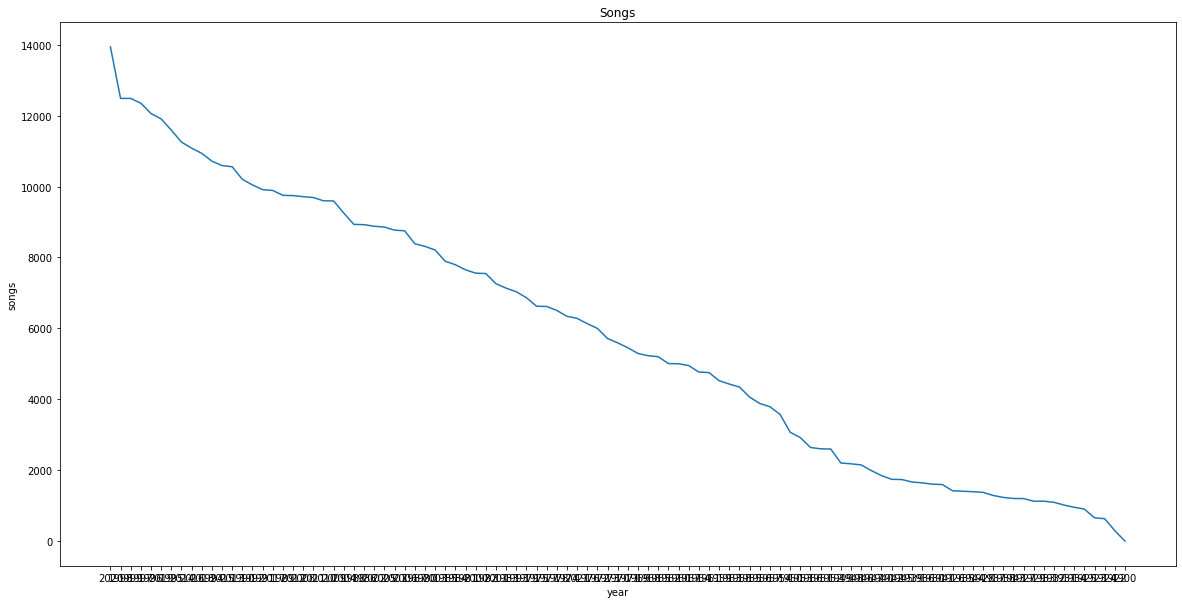

In [89]:
figure = plt.figure(figsize=(20,10))
plt.plot(year['year'],year['No. of songs'])
plt.title("Songs")
plt.xlabel("year")
plt.ylabel("songs")
plt.show()

In [90]:
result.to_csv("Cleaned_data.csv",index=False)